<a href="https://colab.research.google.com/github/NabilahSharfina/Hepatitis-C-Disease/blob/main/Hepatitis_C_Disease_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hepatitis C Disease

<a id="1"></a>
## 1. Problem Statement

<p>
    According to the Centers for Disease Control and Prevention (CDC): <quote>
    Hepatitis C is a liver infection caused by the hepatitis C virus (HCV). Hepatitis C is spread through contact with blood from an infected person. Today, most people become infected with the hepatitis C virus by sharing needles or other equipment used to prepare and inject drugs. For some people, hepatitis C is a short-term illness, but for more than half of people who become infected with the hepatitis C virus, it becomes a long-term, chronic infection. Chronic hepatitis C can result in serious, even life-threatening health problems like cirrhosis and liver cancer. People with chronic hepatitis C can often have no symptoms and don’t feel sick. When symptoms appear, they often are a sign of advanced liver disease. There is no vaccine for hepatitis C. The best way to prevent hepatitis C is by avoiding behaviors that can spread the disease, especially injecting drugs. Getting tested for hepatitis C is important, because treatments can cure most people with hepatitis C in 8 to 12 weeks.
    </quote>
    </p>
<p>Source - <a href="https://www.cdc.gov/hepatitis/hcv/index.htm#:~:text=Hepatitis%20C%20is%20a%20liver,to%20prepare%20and%20inject%20drugs.">cdc.gov - Viral Hepatitis</a></p>
<br/>
<p><strong>Creating a predictive model that could perform early detection of Hepatits C and other liver diseases would allow people to quickly and easily determine their risk/get treatment.</strong></p>
<p>Dataset Source - <a href="https://archive.ics.uci.edu/ml/datasets/HCV+data">UCI Machine Learning Repository</a></p>

## Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
!pip install lightgbm
import lightgbm as lgbm

# For feature importance
from sklearn.datasets import make_classification
from matplotlib import pyplot

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EDA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 7/PUBLIKASI JURNAL/HepatitisC.csv', index_col=[0])
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


<h3>About Each Attribute</h3>
<ul>
<li>`Category`: The target feature. values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'</li>
<li>`Age`: age of the patient in years</li>
<li>`Sex`: sex of the patient ('f'=female, 'm'=male)</li>
<li>`ALB`: amount of albumin in patient's blood</li>
<li>`ALP`: amount of alkaline phosphatase in patient's blood</li>
<li>`ALT`: amount of alanine transaminase in patient's blood</li>
<li>`AST`: amount of aspartate aminotransferase in patient's blood</li>
<li>`BIL`: amount of bilirubin in patient's blood</li>
<li>`CHE`: amount of cholinesterase in patient's blood</li>
<li>`CHOL`: amount of cholesterol in patient's blood</li>
<li>`CREA`: amount of creatine in patient's blood</li>
<li>`GGT`: amount of gamma-glutamyl transferase in patient's blood</li>
<li>`PROT`: amount of protien in patient's blood</li>
</ul>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [5]:
df.dtypes.value_counts()

float64    10
object      2
int64       1
dtype: int64

In [6]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [7]:
# Mengecek baris yang duplikat
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
611    False
612    False
613    False
614    False
615    False
Length: 615, dtype: bool

In [8]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Category`: 5
- Jumlah unique value pada kolom `Age`: 49
- Jumlah unique value pada kolom `Sex`: 2
- Jumlah unique value pada kolom `ALB`: 189
- Jumlah unique value pada kolom `ALP`: 414
- Jumlah unique value pada kolom `ALT`: 341
- Jumlah unique value pada kolom `AST`: 297
- Jumlah unique value pada kolom `BIL`: 188
- Jumlah unique value pada kolom `CHE`: 407
- Jumlah unique value pada kolom `CHOL`: 313
- Jumlah unique value pada kolom `CREA`: 117
- Jumlah unique value pada kolom `GGT`: 358
- Jumlah unique value pada kolom `PROT`: 198


In [9]:
# Melihat isi data dari setiap kolom
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [10]:
# Mapping numeric values
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     '1=Hepatitis' : 1, '2=Fibrosis' : 1, '3=Cirrhosis' : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [11]:
# Filling missing values with the median
df.fillna(df.median(), inplace=True)

# Check missing value
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [12]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['Category',
 'Age',
 'Sex',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

Categorical features:
[]


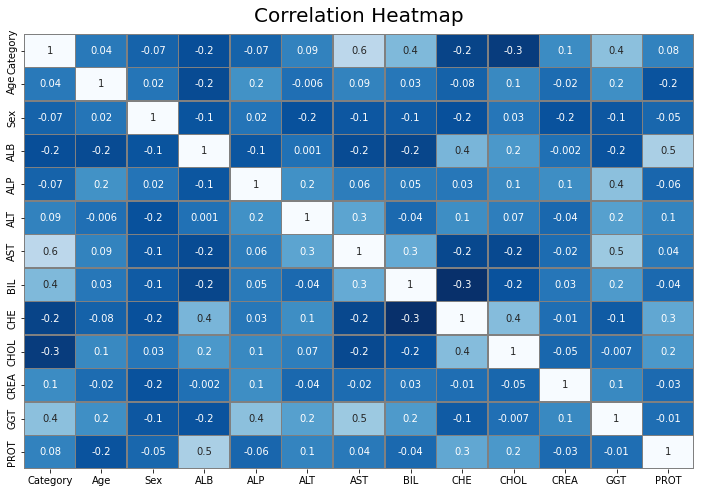

In [13]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

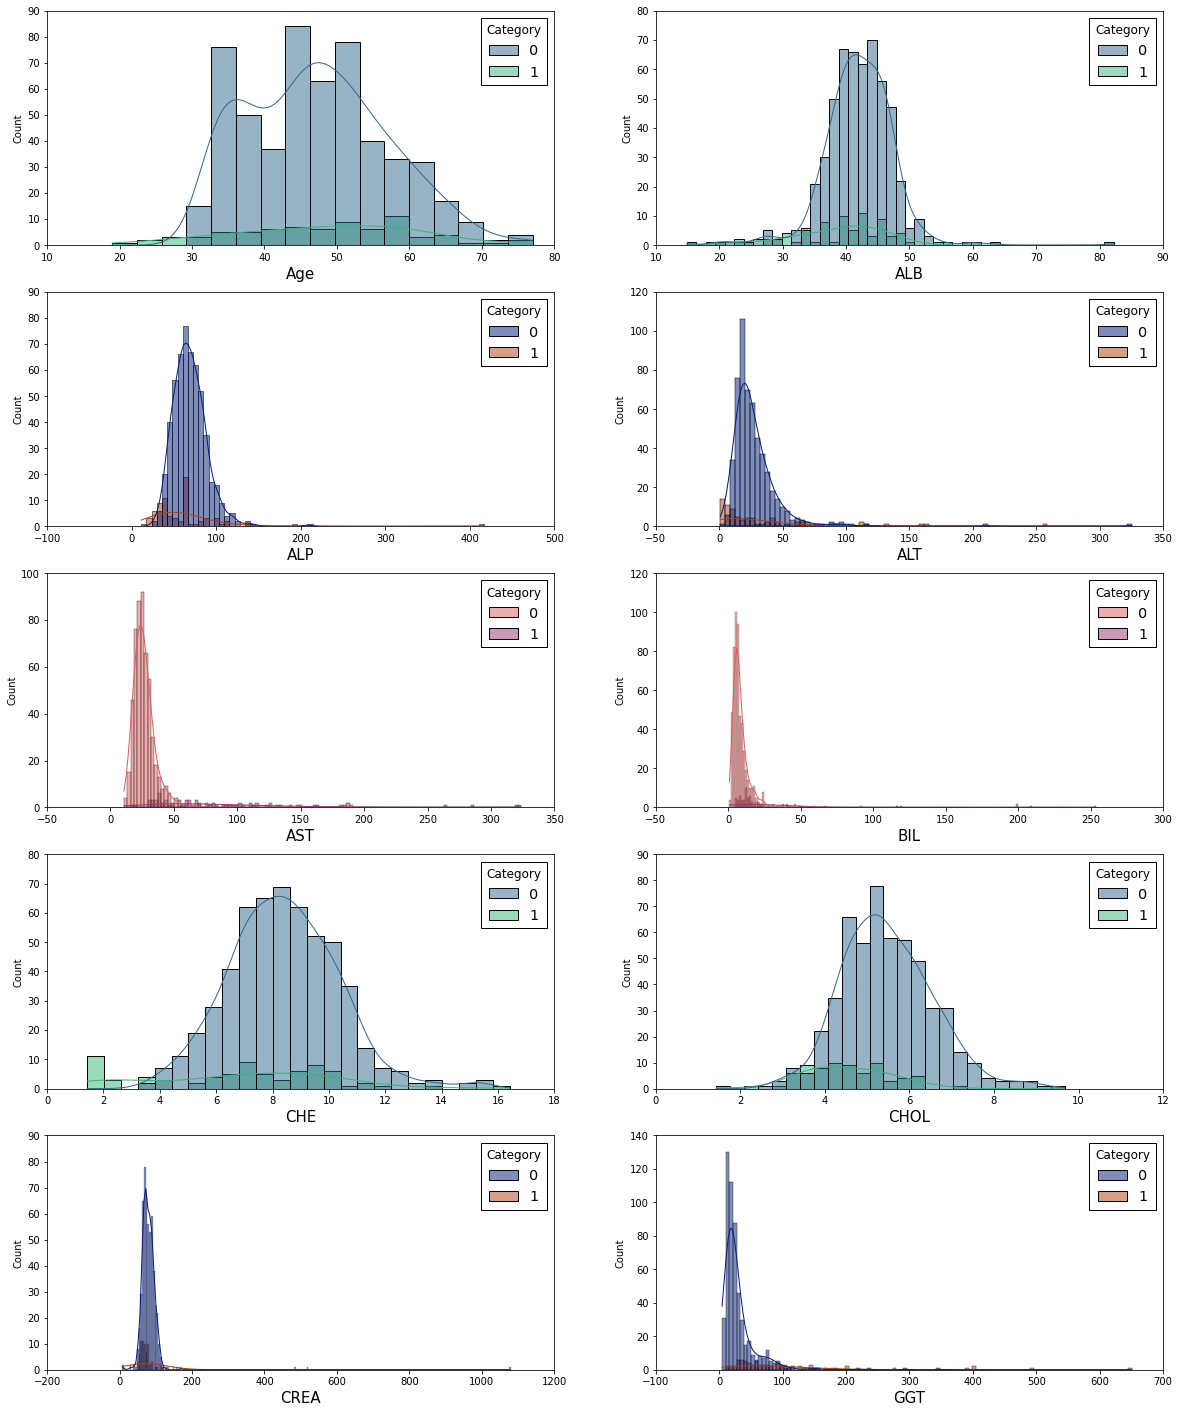

In [14]:
fig, ax =plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

In [15]:
print ('Total Suspected Patients\t: {}'.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients\t\t: {}'.format(df.Category.value_counts()[1]))

Total Suspected Patients	: 540
Total Healthy Patients		: 75


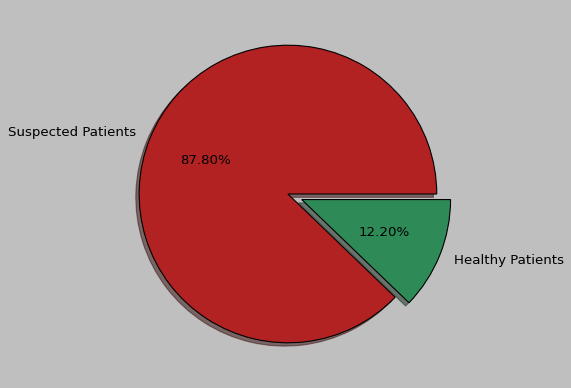

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["Category"].value_counts(),
        colors=["firebrick", "seagreen"], 
        labels=["Suspected Patients", "Healthy Patients"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

In [17]:
df.Sex.value_counts()
# 1 = male
# 2 = female

1    377
2    238
Name: Sex, dtype: int64

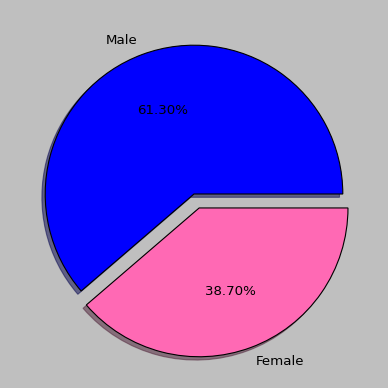

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["blue", "hotpink"], 
        labels=["Male", "Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode=(0, 0.1)
        )

plt.show()

In [19]:
# Creating instance of labelencoding
le = LabelEncoder()

# Assigning numerical values and storing in another column
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 83.4 KB


## Scalling

In [21]:
# X data
X = df.drop('Category', axis=1)

# y data
Y = df["Category"]

In [22]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-1.53361617, -0.79454373, -0.54073873, ...,  0.49707027,
        -0.50228619, -0.56441905],
       [-1.53361617, -0.79454373, -0.54073873, ..., -0.14658961,
        -0.43820313,  0.82605409],
       [-1.53361617, -0.79454373,  0.91475496, ...,  0.09478284,
        -0.11595686,  1.34516406],
       ...,
       [ 1.65143725,  1.25858397, -2.18683279, ..., -0.29342452,
         0.45163601,  1.84573439],
       [-0.1401553 ,  1.25858397, -1.49374055, ..., -0.58910578,
         0.19164186, -0.19362621],
       [ 1.15377266,  1.25858397, -0.97392137, ..., -0.28739021,
        -0.1013093 , -0.74981546]])

## Splitting the data into training and test datasets

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [24]:
len(X_train), len(X_test)

(492, 123)

## Build Model

### 1. WITHOUT SMOTE

#### a. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

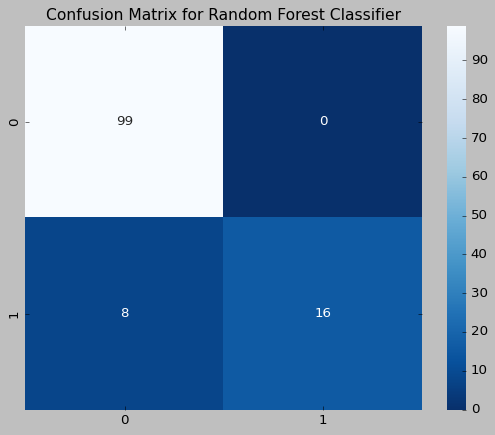

In [26]:
# Confusion Matrix of Random Forest Classifier
Y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(Y_test, Y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [27]:
print("Training Accuracy\t:", rfc.score(X_train, Y_train)*100)
print("Testing Accuracy\t:", rfc.score(X_test, Y_test)*100)

Training Accuracy	: 100.0
Testing Accuracy	: 93.4959349593496


In [28]:
print(metrics.classification_report(Y_test, Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.67      0.80        24

    accuracy                           0.93       123
   macro avg       0.96      0.83      0.88       123
weighted avg       0.94      0.93      0.93       123



#### b. Naive Bayes

In [29]:
# Evaluation Metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

In [30]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train, Y_train)

GaussianNB()

In [31]:
Y_train_nbc = nbc.predict(X_train)
Y_test_nbc = nbc.predict(X_test)

In [32]:
classification_eval(Y_train, Y_train_nbc, 'Naive Bayes Training')

Evaluation Model: Naive Bayes Training
[[428  13]
 [ 14  37]]
Accuracy   : 94.51 %
Precision  : 74.0 %
Recall     : 72.55 %
F1_Score   : 73 %


In [33]:
classification_eval(Y_test, Y_test_nbc, 'Naive Bayes Testing')

Evaluation Model: Naive Bayes Testing
[[95  4]
 [11 13]]
Accuracy   : 87.8 %
Precision  : 76.47 %
Recall     : 54.17 %
F1_Score   : 63 %


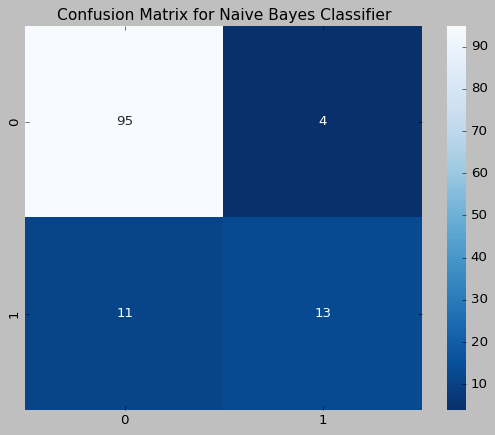

In [34]:
# Confusion Matrix of Naive Bayes Classifier
Y_pred_nbc = nbc.predict(X_test)

cf_matrix = confusion_matrix(Y_test, Y_pred_nbc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Naive Bayes Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [35]:
print("Training Accuracy\t:", nbc.score(X_train, Y_train)*100)
print("Testing Accuracy\t:", nbc.score(X_test, Y_test)*100)

Training Accuracy	: 94.51219512195121
Testing Accuracy	: 87.8048780487805


In [36]:
print(metrics.classification_report(Y_test, Y_pred_nbc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.76      0.54      0.63        24

    accuracy                           0.88       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.87      0.88      0.87       123



### 2. WITH SMOTE

In [37]:
# Define smote
oversampling = SMOTE(sampling_strategy='auto')

# Fit the over sampling
X_smote, Y_smote = oversampling.fit_resample(X_train, Y_train)

print('Original dataset shape is ', Counter(Y_train))
print('Resample dataset shape is ', Counter(Y_smote))

Original dataset shape is  Counter({0: 441, 1: 51})
Resample dataset shape is  Counter({0: 441, 1: 441})


#### a. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_smote, Y_smote)

RandomForestClassifier()

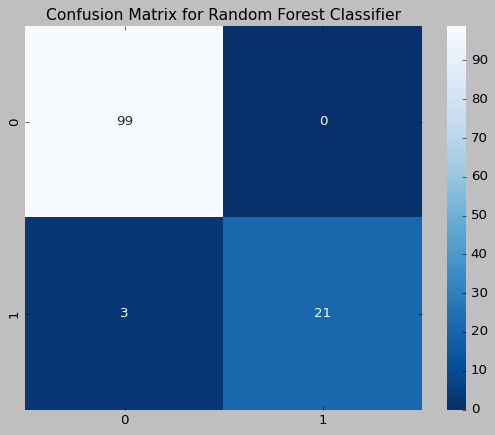

In [39]:
# Confusion Matrix of Random Forest Classifier
Y_pred_rfc = rfc.predict(X_test)

cf_matrix = confusion_matrix(Y_test, Y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [40]:
print("Training Accuracy\t:", rfc.score(X_train, Y_train)*100)
print("Testing Accuracy\t:", rfc.score(X_test, Y_test)*100)

Training Accuracy	: 100.0
Testing Accuracy	: 97.5609756097561


In [41]:
print(metrics.classification_report(Y_test, Y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        99
           1       1.00      0.88      0.93        24

    accuracy                           0.98       123
   macro avg       0.99      0.94      0.96       123
weighted avg       0.98      0.98      0.97       123



#### b. Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_smote, Y_smote)

GaussianNB()

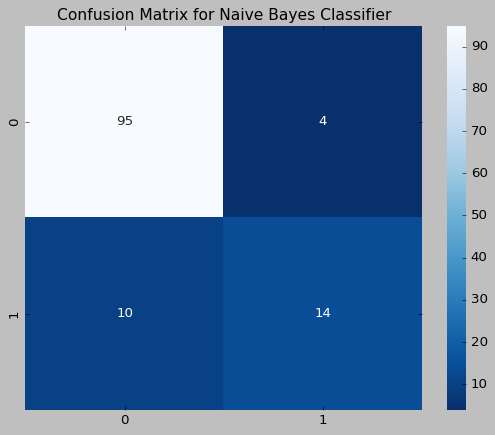

In [43]:
# Confusion Matrix of Naive Bayes Classifier
Y_pred_nbc = nbc.predict(X_test)

cf_matrix = confusion_matrix(Y_test, Y_pred_nbc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Naive Bayes Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [44]:
print("Training Accuracy\t:", nbc.score(X_train, Y_train)*100)
print("Testing Accuracy\t:", nbc.score(X_test, Y_test)*100)

Training Accuracy	: 93.69918699186992
Testing Accuracy	: 88.6178861788618


In [45]:
print(metrics.classification_report(Y_test, Y_pred_nbc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.78      0.58      0.67        24

    accuracy                           0.89       123
   macro avg       0.84      0.77      0.80       123
weighted avg       0.88      0.89      0.88       123

